<a href="https://colab.research.google.com/github/gingerboredman/GTA-V-AutoDrive/blob/master/GTA5_transferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
'''
import zipfile
zip_ref = zipfile.ZipFile("gdrive/My Drive/training_data.zip", 'r')
zip_ref.extractall("gdrive/My Drive")
zip_ref.close()
'''

'\nimport zipfile\nzip_ref = zipfile.ZipFile("gdrive/My Drive/training_data.zip", \'r\')\nzip_ref.extractall("gdrive/My Drive")\nzip_ref.close()\n'

In [0]:
import numpy as np
from collections import Counter
import pandas as pd
from random import shuffle
train_data = np.load('gdrive/My Drive/training_data.npy',allow_pickle = True)
df = pd.DataFrame(train_data)
print(Counter(df[1].apply(str)))
print(train_data.shape)
'''
w = [1,0,0,0,0,0,0,0,0]
a = [0,1,0,0,0,0,0,0,0]
s = [0,0,1,0,0,0,0,0,0]
d = [0,0,0,1,0,0,0,0,0]
wa =[0,0,0,0,1,0,0,0,0]
wd =[0,0,0,0,0,1,0,0,0]
sa =[0,0,0,0,0,0,1,0,0]
sd =[0,0,0,0,0,0,0,1,0]
nk =[0,0,0,0,0,0,0,0,1]
'''
i = 0
a = 0
while i < len(train_data):
    if train_data[i][1] == [1,0,0,0,0,0,0,0,0]:
      a+=1
      # 1 frame of w considered for every 5 consecutive occurance of it
      if a%5 != 0:
        train_data = np.delete(train_data, i, 0)
        i-=1
    i+=1
df = pd.DataFrame(train_data)
print(Counter(df[1].apply(str)))
print(train_data.shape)

Counter({'[1, 0, 0, 0, 0, 0, 0, 0, 0]': 14380, '[0, 0, 0, 0, 0, 1, 0, 0, 0]': 1034, '[0, 0, 0, 0, 0, 0, 0, 0, 1]': 871, '[0, 0, 0, 0, 1, 0, 0, 0, 0]': 819, '[0, 0, 1, 0, 0, 0, 0, 0, 0]': 415, '[0, 1, 0, 0, 0, 0, 0, 0, 0]': 325, '[0, 0, 0, 1, 0, 0, 0, 0, 0]': 156})
(18000, 2)
Counter({'[1, 0, 0, 0, 0, 0, 0, 0, 0]': 2876, '[0, 0, 0, 0, 0, 1, 0, 0, 0]': 1034, '[0, 0, 0, 0, 0, 0, 0, 0, 1]': 871, '[0, 0, 0, 0, 1, 0, 0, 0, 0]': 819, '[0, 0, 1, 0, 0, 0, 0, 0, 0]': 415, '[0, 1, 0, 0, 0, 0, 0, 0, 0]': 325, '[0, 0, 0, 1, 0, 0, 0, 0, 0]': 156})
(6496, 2)


(6496, 120, 160, 3)
(6496, 9)
[1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0]
[1 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0]


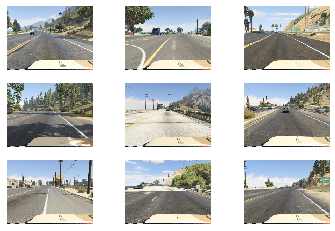

In [0]:
import matplotlib.pyplot as plt
import cv2
from random import randint
X = np.array([i[0] for i in train_data]).reshape(-1,120,160,3)
Y = np.array([i[1] for i in train_data])

print(X.shape)
print(Y.shape)
r,c = 3,3
fig, axs = plt.subplots(r, c)

for i in range(r):
  for j in range(c):
    tmp = randint(0, len(X)-1)
    axs[i,j].imshow(cv2.cvtColor(X[tmp], cv2.COLOR_BGR2RGB))
    axs[i,j].axis('off')
    print(Y[tmp])
cnt = 0
input_shape=(120,160,3)


In [0]:
'''
Inception Model needs input shapes of atleast 75 pixels dimensions, hence 60x80x1 falls short. Hence Dataset changed to 120x160x3. Also RGB included.
https://medium.com/abraia/first-steps-with-transfer-learning-for-custom-image-classification-with-keras-b941601fcad5

import keras
from keras.models import Model
from keras.layers import Dense
Base_model = keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=input_shape, pooling=None, classes=1000)
model = Base_model.output
model = keras.layers.GlobalMaxPooling2D(name='avg_pool')(model)
predictions = Dense(9,activation = 'softmax')(model)
model = Model(inputs = Base_model.input,output = predictions)
for layer in Base_model.layers:
    layer.trainable = False
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])    
model.summary()
'''

"\nInception Model needs input shapes of atleast 75 pixels dimensions, hence 60x80x1 falls short. Hence Dataset changed to 120x160x3. Also RGB included.\nhttps://medium.com/abraia/first-steps-with-transfer-learning-for-custom-image-classification-with-keras-b941601fcad5\n\nimport keras\nfrom keras.models import Model\nfrom keras.layers import Dense\nBase_model = keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=input_shape, pooling=None, classes=1000)\nmodel = Base_model.output\nmodel = keras.layers.GlobalMaxPooling2D(name='avg_pool')(model)\npredictions = Dense(9,activation = 'softmax')(model)\nmodel = Model(inputs = Base_model.input,output = predictions)\nfor layer in Base_model.layers:\n    layer.trainable = False\nmodel.compile(optimizer='rmsprop',\n              loss='categorical_crossentropy',\n              metrics=['accuracy'])    \nmodel.summary()\n"

In [0]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications.xception import Xception
import keras
base_model = Xception(weights=None, include_top=False, input_shape=input_shape)
x = base_model.output
x = GlobalAveragePooling2D()(x)
out = Dense(9, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=out)
learning_rate = 0.001
opt = keras.optimizers.adam(lr=learning_rate, decay=1e-5)
model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
model.summary()

Using TensorFlow backend.
















Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 120, 160, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 59, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 59, 79, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 59, 79, 32)   0           block1_conv1_bn[0][0]            
______________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/15
6496/6496 [==============================] - 54s 8ms/step - loss: 1.0425 - acc: 0.6039
Epoch 2/15
6496/6496 [==============================] - 39s 6ms/step - loss: 0.6727 - acc: 0.7309
Epoch 3/15
6496/6496 [==============================] - 39s 6ms/step - loss: 0.4817 - acc: 0.8128
Epoch 4/15
6496/6496 [==============================] - 39s 6ms/step - loss: 0.3624 - acc: 0.8701
Epoch 5/15
6496/6496 [==============================] - 39s 6ms/step - loss: 0.2876 - acc: 0.8987
Epoch 6/15
6496/6496 [==============================] - 39s 6ms/step - loss: 0.2501 - acc: 0.9149
Epoch 7/15
6496/6496 [==============================] - 39s 6ms/step - loss: 0.1880 - acc: 0.9401
Epoch 8/15
6496/6496 [==============================] - 39s 6ms/step - loss: 0.1823 - acc: 0.9452
Epoch 9/15
6496/6496 [==============================] - 39s 6ms/step - loss: 0.1769 - acc: 0.9478
Epoch 10/15
6496/6496 

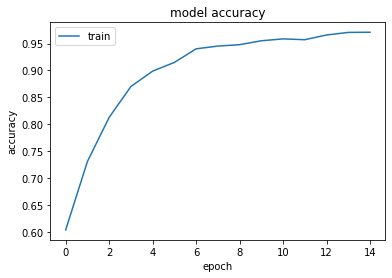

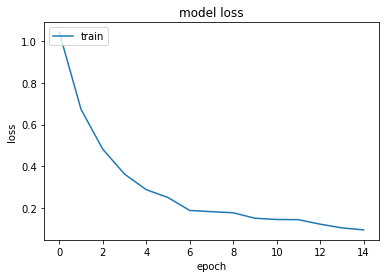

In [0]:

history = model.fit(X,Y,epochs = 15)
model.save("gdrive/My Drive/xception_model_gtaV.h5")
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
test_Y = model.predict(np.array([X[0]]))[0]
print(test_Y)
#print(np.argmax(weighted))
cnt = 0
i = 0
tot = 0
while i<=500:
  tmp = model.predict(np.array([X[tot]]))#*np.array([0.030903154382632643, 1000.0, 0.020275559590445278, 0.013302794647291147, 0.0225283995449392, 0.025031555049932444, 1000.0, 1000.0, 0.016423203268260675])
  if np.argmax(tmp)!=0:
    if np.argmax(tmp)==np.argmax(Y[tot]):
      cnt+=1
  if np.argmax(np.array(Y[tot]))!=0:
    i+=1
  tot+=1
print(cnt , cnt/500)

[9.9718297e-01 4.0527966e-06 4.8430466e-06 2.4749159e-05 1.4850239e-03
 1.2325196e-03 6.4547756e-08 5.0957464e-08 6.5793327e-05]
486 0.972
